[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
             V      AAPL      TSLA        GE         T      PLTR      NVDA  \
V     0.027119  0.016967  0.032211  0.016961  0.007327  0.027442  0.028933   
AAPL  0.016967  0.042890  0.054313  0.013032  0.007613  0.047409  0.046131   
TSLA  0.032211  0.054313  0.302737  0.026097  0.025085  0.171276  0.126121  

Text(0.5, 1.0, 'Markowitz Efficient Frontier')

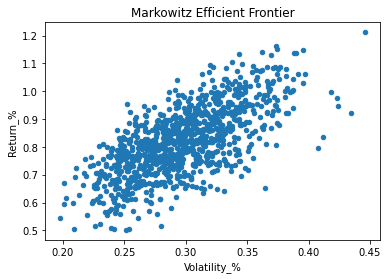

In [3]:
#Working 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf


assets = ["V","AAPL","TSLA","GE","T","PLTR","NVDA","MSFT","SNAP","COIN"]
stock_data = pd.DataFrame()


for stock in assets:
    stock_data[stock] = yf.download(stock, start='2023-01-01', end=None)['Adj Close']

#computing expected return for eqch stock
returns = np.log(stock_data / stock_data.shift(1))
# covariance and correlation matrices
covarience = returns.cov () * 250
correlation = returns.corr()
print(covarience)

# Calculating the efficient frontier
portfolio_returns = []
portfolio_volatility = []
num_assets = len(assets)


for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * (returns.mean()) *250))
    portfolio_volatility.append(np.sqrt(np.dot(weights,np.dot(returns.cov()*250,weights))))

portfolio_returns = np.array(portfolio_returns)
portfolio_volotilities = np.array(portfolio_volatility)

portfolio_returns, portfolio_volatility

portfolios = pd.DataFrame({'Return_%': portfolio_returns, "Volatility_%":portfolio_volatility})


portfolios.plot(x ="Volatility_%",y ="Return_%",kind = "scatter")
plt.title("Markowitz Efficient Frontier")


#print(stock_data)
#print(covarience)
#print(correlation)











In [4]:
import plotly.express as px
import pandas as pd

data = correlation
table = pd.DataFrame(data)
print(table)

fig = px.imshow(table.corr(), x=table.columns, y=table.columns, color_continuous_scale='RdBu', title='Correlation Matrix')
fig.update_layout(width=800, height=800)
fig.show()


             V      AAPL      TSLA        GE         T      PLTR      NVDA  \
V     1.000000  0.497514  0.355494  0.416184  0.150481  0.235465  0.336822   
AAPL  0.497514  1.000000  0.476642  0.254283  0.124339  0.323469  0.427030   
TSLA  0.355494  0.476642  1.000000  0.191658  0.154199  0.439859  0.439434   
GE    0.416184  0.254283  0.191658  1.000000  0.055140  0.210581  0.297061   
T     0.150481  0.124339  0.154199  0.055140  1.000000  0.060706 -0.095688   
PLTR  0.235465  0.323469  0.439859  0.210581  0.060706  1.000000  0.398016   
NVDA  0.336822  0.427030  0.439434  0.297061 -0.095688  0.398016  1.000000   
MSFT  0.279195  0.531091  0.323755  0.171665 -0.054160  0.345273  0.559682   
SNAP  0.300073  0.359162  0.340058  0.259932  0.125423  0.353948  0.187620   
COIN  0.271926  0.353376  0.458442  0.193945  0.172347  0.399813  0.306170   

          MSFT      SNAP      COIN  
V     0.279195  0.300073  0.271926  
AAPL  0.531091  0.359162  0.353376  
TSLA  0.323755  0.340058  0.45